In [ ]:
# Insert code here.

In [5]:
!pip install seaborn

     |████████████████████████████████| 215kB 3.1MB/s eta 0:00:01


In [4]:
!pip install seaborn

     |████████████████████████████████| 215kB 3.3MB/s eta 0:00:01


In [2]:
!pip install seaborn

     |████████████████████████████████| 215kB 3.4MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict


import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
import time 
import datetime
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import FactorAnalysis

In [2]:
# load the data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./Mytest4.csv")
# data = pd.read_csv("./mydata.csv")
data.head()

,BF1,BF2,BF3,BF4,BF5,CS1,CS2,CS3,CS4,FIE1,FIE2,FIE3,FIE4,FT1,FT2,FT3,FT4,YD1,YD2,YD3,YD4
0,4,4,4,4,4,4,4,4,4,3,4,3,4,3,4,3,4,3,3,3,4
1,3,2,4,3,3,3,4,3,4,4,4,3,4,3,3,3,4,4,4,4,4
2,5,3,4,3,3,3,4,3,4,3,3,4,5,3,3,3,3,4,4,4,4
3,4,3,3,4,3,3,2,2,2,3,3,2,3,3,2,3,3,3,3,3,3
4,3,3,3,3,3,2,3,2,2,4,3,4,4,3,4,3,4,3,3,3,3


In [148]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

transformer = FactorAnalysis(n_components=5, random_state=0)
transformer.fit(X)
X_transformed = transformer.transform(X)

In [149]:

transformer = FactorAnalysis(n_components=5, random_state=0)
transformer.fit(data)
X_transformed = transformer.transform(data)


In [133]:

a = pd.DataFrame(transformer.components_, columns=data.columns)
a.transpose()

,0,1,2,3,4
BF1,-0.116093,-0.042257,0.036580,-0.265794,-0.107316
BF2,-0.359676,-0.020184,0.085178,-0.370862,-0.325107
BF3,-0.311659,-0.171103,-0.006110,-0.175977,-0.328934
BF4,-0.328226,-0.210132,-0.043275,-0.168206,0.074761
BF5,-0.324005,-0.218013,0.010694,-0.166122,-0.169126
CS1,-0.670448,0.437558,0.072802,-0.084396,0.044313
CS2,-0.547039,0.067103,0.075668,0.094191,0.102087
CS3,-0.556409,0.147574,0.064455,-0.003241,-0.005530
CS4,-0.490787,0.245450,0.097545,0.024019,-0.086301
FIE1,-0.454220,-0.138787,-0.398147,-0.076730,0.181715


Text(0.5, 1, 'Variable Correlation')

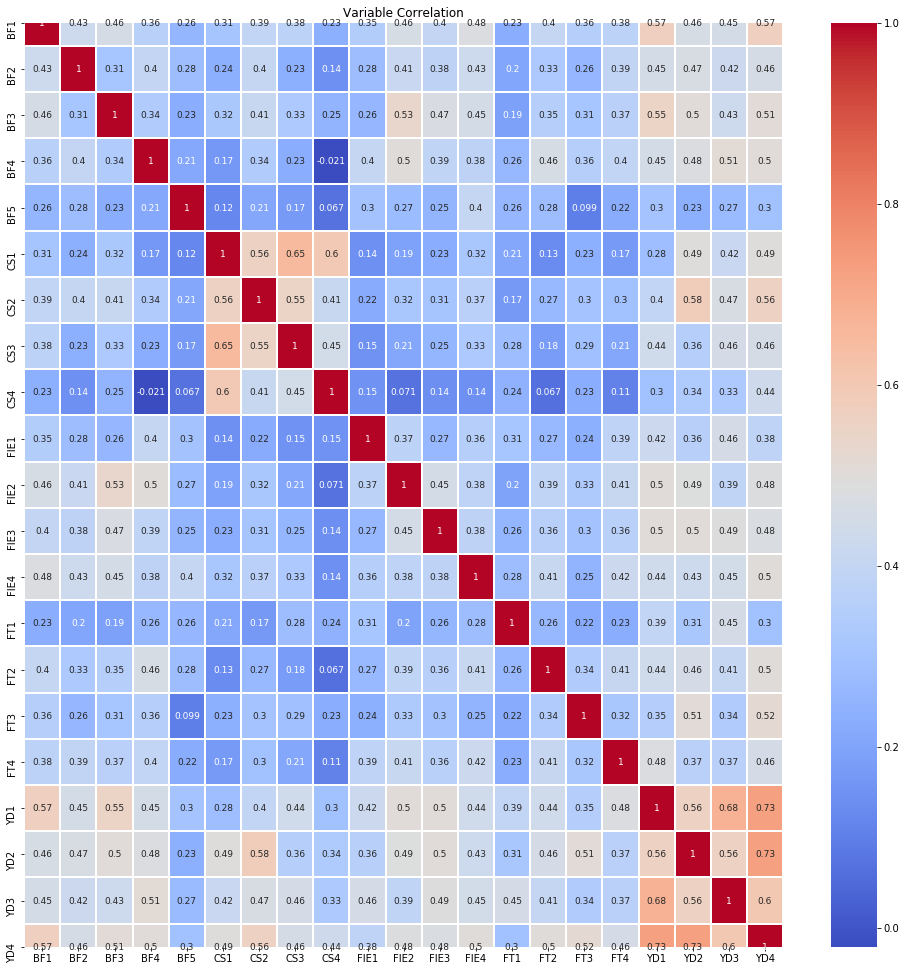

In [110]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

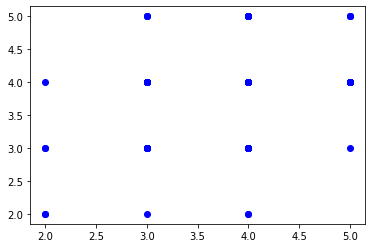

In [16]:
col1 = 'BF1'
col2 = 'BF5'
fig, ax1 = plt.subplots()
ax1.plot(data[col1], data[col2], 'bo')
plt.show()

In [37]:
data2 = data.copy()

In [39]:
# modify data
col = 'BF5'
def modify_base_bf1(d):
    if (d['BF1'] == 3 and d['BF5'] == 5):
        return 4
    return d[col]
    
def modify_bf2_bf3(d):
    if (d['BF2'] == 3 and d['BF3'] == 5):
        return 4
    return d[col]
    
data2[col] = data2.apply(modify_base_bf1, axis = 1)


In [ ]:
data2

(0.3385757492755704, 0.00041121905090280123)


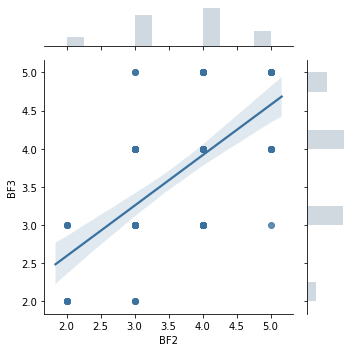

In [44]:

g = sns.JointGrid(data=data2, x='BF2', y='BF3', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data2['BF1'], data2['BF5']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

(0.28868509727807, 0.0028210607698403896)


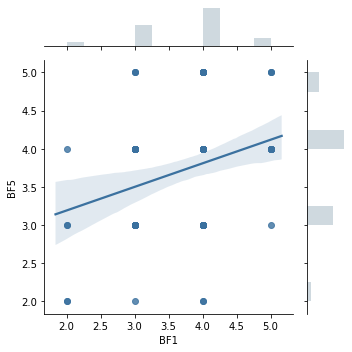

In [42]:
g = sns.JointGrid(data=data, x='BF1', y='BF5', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data['BF1'], data['BF5']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [45]:
data2.to_csv("./output_my.csv", index= False)

In [ ]:
data

In [3]:
data_mean = pd.DataFrame()
col = data.loc[: , "YD1":"YD4"]
data_mean['YD'] = col.mean(axis=1)
col = data.loc[: , "BF1":"BF5"]
data_mean['BF'] = col.mean(axis=1)
col = data.loc[: , "FT1":"FT4"]
data_mean['FT'] = col.mean(axis=1)
col = data.loc[: , "FIE1":"FIE4"]
data_mean['FIE'] = col.mean(axis=1)
col = data.loc[: , "CS1":"CS4"]
data_mean['CS'] = col.mean(axis=1)
data_mean.head()

,YD,BF,FT,FIE,CS
0,3.25,4.0,3.50,3.50,4.00
1,4.00,3.0,3.25,3.75,3.50
2,4.00,3.6,3.00,3.75,3.50
3,3.00,3.4,2.75,2.75,2.25
4,3.00,3.0,3.50,3.75,2.25


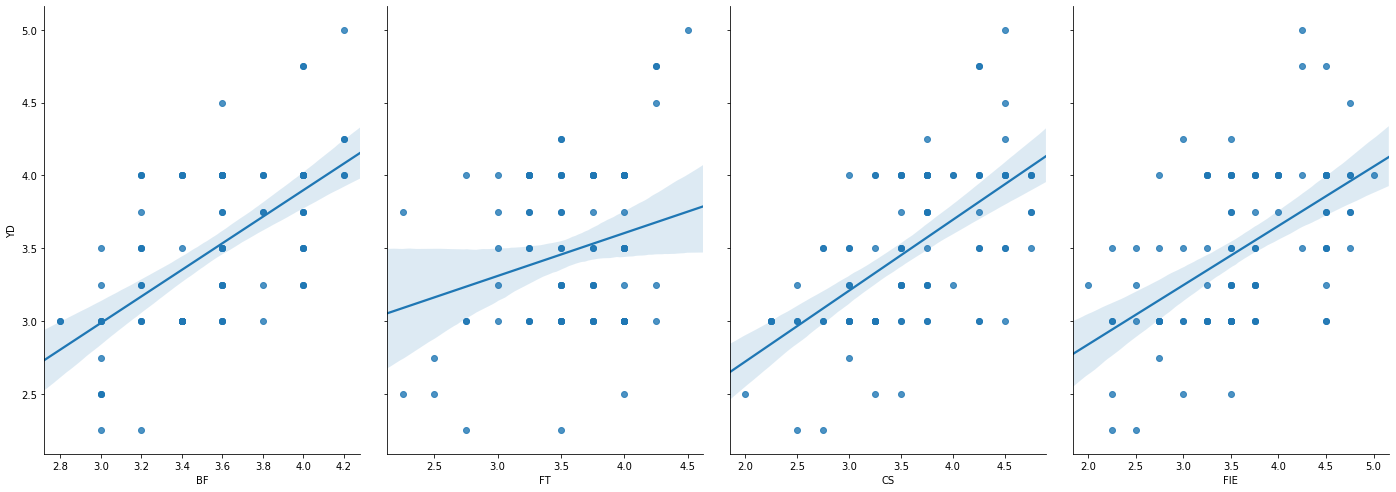

In [26]:
sns.pairplot(data_mean, x_vars=['BF','FT','CS', 'FIE'], y_vars='YD', size=7, aspect=0.7, kind='reg')

In [139]:
sns.pairplot(data_mean, x_vars=['YD'], y_vars='BF', size=7, aspect=0.7, kind='reg')

In [5]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] <= 2.5 and x['YD'] < 3):
        return 3
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)


In [11]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] == 3 and x['YD'] == 4):
        return 3.6
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)

In [15]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] > 4.3):
        return 4
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)

In [19]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] > 3.4 and x['YD'] < 2.5):
        return 3.2
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)

In [22]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] == 4 and x['YD'] == 3):
        return 3.4
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)

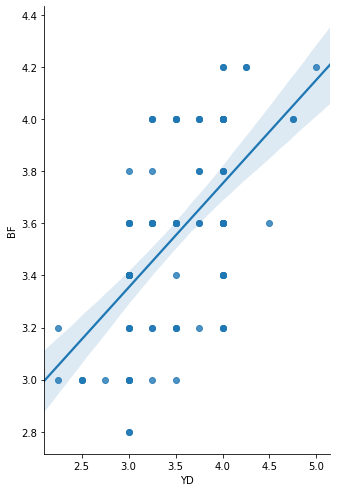

In [23]:
sns.pairplot(data_mean, x_vars=['YD'], y_vars='BF', size=7, aspect=0.7, kind='reg')

In [7]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] > 4.5 ):
        return 4
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)


In [25]:
data_mean.to_csv('./fix_bf.csv', index=False)

Text(0.5, 1, 'Variable Correlation')

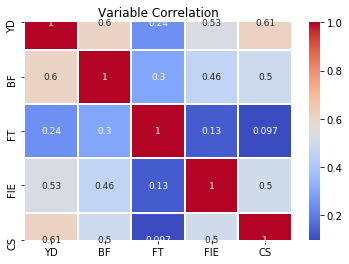

In [27]:

sns.heatmap(data_mean.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [24]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='YD ~ BF + FT + CS + FIE', data=data_mean).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     YD   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     28.20
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.09e-15
Time:                        11:01:45   Log-Likelihood:                -43.869
No. Observations:                 105   AIC:                             97.74
Df Residuals:                     100   BIC:                             111.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1141      0.420     -0.272      0.7

In [154]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='YD ~ BF + FT + CS + FIE', data=data_mean).fit()
lm1.summary()

In [151]:
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YD   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     22.41
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           3.13e-13
Time:                        10:47:11   Log-Likelihood:                -49.922
No. Observations:                 105   AIC:                             109.8
Df Residuals:                     100   BIC:                             123.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5799      0.406      1.429      0.156      -0.225       1.385
BF             0.0879      0.106      0.826      0.411      -0.123       0.299
FT             0.1710      0.093      1.829      0.070      -0.014       0.356
CS             0.3521      0.068      5.200      0.000       0.218       0.486
FIE            0.1993      0.067      2.961      0.004       0.066       0.333
==============================================================================
Omnibus:                        6.378   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                2.843
Skew:                           0.014   Prob(JB):                        0.241
Kurtosis:                       2.194   Cond. No.                         77.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
print(pearsonr(data_mean['CS'], data_mean['YD']))
print(pearsonr(data_mean['BF'], data_mean['YD']))
print(pearsonr(data_mean['FT'], data_mean['YD']))
print(pearsonr(data_mean['FIE'], data_mean['YD']))

(0.6134213723050637, 3.4822497827541808e-12)
(0.19386413489561086, 0.04752642392676976)
(0.22835031595586547, 0.019132974425537196)
(0.36532911116535827, 0.00012708835796539458)


In [89]:
# ## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] > 4 and x['YD'] >= 3 and x['YD'] <= 4):
        return 4
    if (x['BF'] < 3 and x['YD'] >= 3 and x['YD'] <= 4):
        return 3
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)

/opt/shared-venv/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


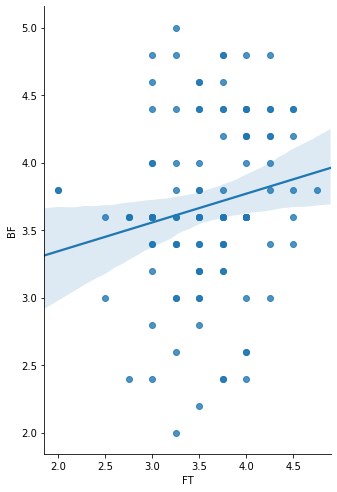

In [126]:
sns.pairplot(data_mean, x_vars=['FT'], y_vars='BF', size=7, aspect=0.7, kind='reg')

In [92]:
lm2 = smf.ols(formula='YD ~ BF + FT + CS + FIE', data=data_mean).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YD   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     17.18
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           9.38e-11
Time:                        06:55:11   Log-Likelihood:                -56.060
No. Observations:                 105   AIC:                             122.1
Df Residuals:                     100   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8668      0.511      1.696      0.093      -0.147       1.881
BF             0.0280      0.115      0.244      0.808      -0.199       0.255
FT             0.1872      0.107      1.757      0.082      -0.024       0.399
CS             0.4309      0.070      6.191      0.000       0.293       0.569
FIE            0.0804      0.068      1.188      0.238      -0.054       0.215
==============================================================================
Omnibus:                        4.053   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                2.201
Skew:                          -0.014   Prob(JB):                        0.333
Kurtosis:                       2.291   Cond. No.                         92.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from scipy import stats
stats.ttest_ind(data_mean['FT'], data_mean['YD'])

Ttest_indResult(statistic=3.05602233841622, pvalue=0.0025368521440334987)

In [67]:
# Linear regression 
# Create features variable 
X =data_mean[['BF','FT','FIE','CS']]

# Create target variable
y = data_mean['YD']
model = LinearRegression()
model.fit(X,y)
y_predicted = model.predict(X)
model.coef_


array([-0.03639604, -0.13269099,  0.11137415,  0.44987669])

In [39]:
!pip install statsmodels

     |████████████████████████████████| 8.1MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 34.5MB/s eta 0:00:01


In [ ]:
X

In [69]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     YD   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.04e-10
Time:                        04:59:22   Log-Likelihood:                -56.169
No. Observations:                 105   AIC:                             122.3
Df Residuals:                     100   BIC:                             135.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1591      0.422      5.111      0.0

In [46]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     YD   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              1436.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                    5.08e-88
Time:                        04:38:12   Log-Likelihood:                         -68.354
No. Observations:                 105   AIC:                                      144.7
Df Residuals:                     101   BIC:                                      155.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
print(results['BF'].t_test([1, 0]))

TypeError: 'RegressionResultsWrapper' object is not subscriptable

In [ ]:
sse = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])


In [34]:
sse = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
se = np.array([
    np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                            for i in range(sse.shape[0])
            ])

t = self.coef_ / se
p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))


IndexError: tuple index out of range

(0.19386413489561086, 0.04752642392676976)


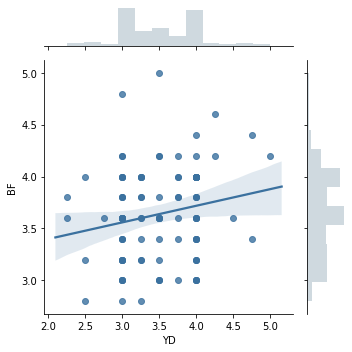

In [74]:
g = sns.JointGrid(data=data_mean, x='YD', y='BF', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data_mean['BF'], data_mean['YD']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [75]:
## note cắt bớt BF khúc trên 
def modify_bf_yd(x):
    if (x['BF'] > 4 and x['YD'] >= 3 and x['YD'] <= 4):
        return 4
    if (x['BF'] < 3 and x['YD'] >= 3 and x['YD'] <= 4):
        return 3
    return x['BF']
data_mean['BF'] = data_mean.apply(modify_bf_yd, axis = 1)


(0.2269197546288216, 0.019919778064351617)


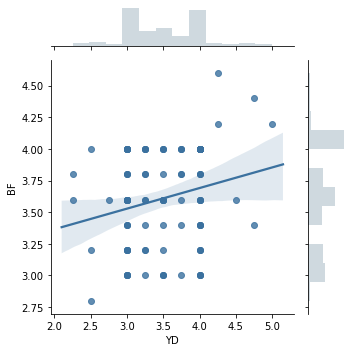

In [76]:
g = sns.JointGrid(data=data_mean, x='YD', y='BF', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data_mean['BF'], data_mean['YD']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [44]:
data_mean.to_csv('./data_mean.csv', index=False)

(-0.09763803098889683, 0.3217413948500812)


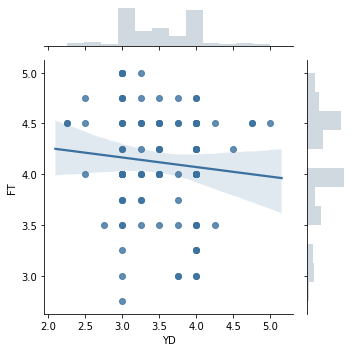

In [45]:
# FT
g = sns.JointGrid(data=data_mean, x='YD', y='FT', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data_mean['FT'], data_mean['YD']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [48]:
# modify FT
def modify_ft_yd(x):
    if (x['FT'] > 4 and x['YD'] < 3):
        return 3
    if (x['FT'] > 4 and x['YD'] >= 3 and x['YD'] <= 4):
        return 4
    return x['FT']
data_mean['FT'] = data_mean.apply(modify_ft_yd, axis = 1)


(0.29266496336568393, 0.0024483523866504135)


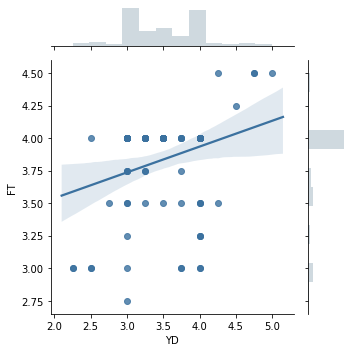

In [49]:
# FT
g = sns.JointGrid(data=data_mean, x='YD', y='FT', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data_mean['FT'], data_mean['YD']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

In [50]:
data_mean.to_csv('./data_mean.csv', index=False)

(0.6134213723050637, 3.4822497827541808e-12)


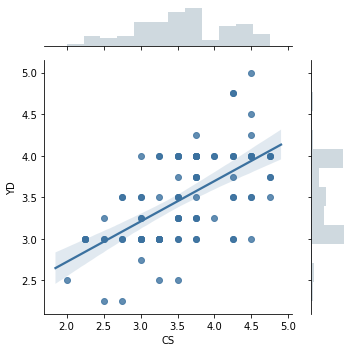

In [20]:
g = sns.JointGrid(data=data_mean, x='CS', y='YD', height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
print(pearsonr(data_mean['CS'], data_mean['YD']))
# g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()

Text(0.5, 1, 'Variable Correlation')

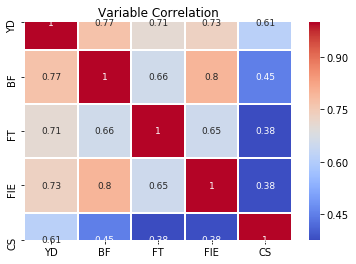

In [111]:

sns.heatmap(data_mean.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [8]:
plt.figure(figsize=(17,17))
sns.heatmap(X_transformed.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1224x1224 with 0 Axes>